In [2]:
from pathlib import Path

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from plate_planner.plate import Plate, QCPlate, SamplePlate, Well, PlateFactory
from plate_planner.study import Study

ModuleNotFoundError: No module named 'src'

In [ ]:
p = Plate([1,2])
records = p.as_records()

[    INFO] --- Created a 1x2 plate with 2 wells.


In [ ]:
sorted(records[0].keys())

['coordinate', 'empty', 'index', 'name', 'plate_id', 'rgb_color']

In [ ]:
p = Plate(plate_dim=(8,12))
p.size

[    INFO] --- Created a 8x12 plate with 96 wells.


96

In [ ]:
p._rows

[0, 1, 2, 3, 4, 5, 6, 7]

In [ ]:
p.as_dataframe()

name  plate_id coordinate  index  empty  rgb_color
0    A1         1     (7, 0)      0   True  (1, 1, 1)
1    A2         1     (7, 1)      1   True  (1, 1, 1)
2    A3         1     (7, 2)      2   True  (1, 1, 1)
3    A4         1     (7, 3)      3   True  (1, 1, 1)
4    A5         1     (7, 4)      4   True  (1, 1, 1)
..  ...       ...        ...    ...    ...        ...
91   H8         1     (0, 7)     91   True  (1, 1, 1)
92   H9         1     (0, 8)     92   True  (1, 1, 1)
93  H10         1     (0, 9)     93   True  (1, 1, 1)
94  H11         1    (0, 10)     94   True  (1, 1, 1)
95  H12         1    (0, 11)     95   True  (1, 1, 1)

[96 rows x 6 columns]

In [ ]:
p[0].set_attribute_or_metadata("disease", "kalles syndrome")
p[0]

Well(name='A1', plate_id=1, coordinate=(7, 0), index=0, empty=True, rgb_color=(1, 1, 1), metadata={'disease': 'kalles syndrome'})

In [ ]:
p[1]

Well(name='A2', plate_id=1, coordinate=(7, 1), index=1, empty=True, rgb_color=(1, 1, 1), metadata={})

In [ ]:
p.as_dataframe()

name  plate_id coordinate  index  empty  rgb_color          disease
0    A1         1     (7, 0)      0   True  (1, 1, 1)  kalles syndrome
1    A2         1     (7, 1)      1   True  (1, 1, 1)              NaN
2    A3         1     (7, 2)      2   True  (1, 1, 1)              NaN
3    A4         1     (7, 3)      3   True  (1, 1, 1)              NaN
4    A5         1     (7, 4)      4   True  (1, 1, 1)              NaN
..  ...       ...        ...    ...    ...        ...              ...
91   H8         1     (0, 7)     91   True  (1, 1, 1)              NaN
92   H9         1     (0, 8)     92   True  (1, 1, 1)              NaN
93  H10         1     (0, 9)     93   True  (1, 1, 1)              NaN
94  H11         1    (0, 10)     94   True  (1, 1, 1)              NaN
95  H12         1    (0, 11)     95   True  (1, 1, 1)              NaN

[96 rows x 7 columns]

In [ ]:
ps = SamplePlate()
ps.as_dataframe()

[    INFO] --- Created a 8x12 plate with 96 wells.


name  plate_id coordinate  index  empty  rgb_color sample_code sample_name
0    A1         1     (7, 0)      0   True  (1, 1, 1)           S    Specimen
1    A2         1     (7, 1)      1   True  (1, 1, 1)           S    Specimen
2    A3         1     (7, 2)      2   True  (1, 1, 1)           S    Specimen
3    A4         1     (7, 3)      3   True  (1, 1, 1)           S    Specimen
4    A5         1     (7, 4)      4   True  (1, 1, 1)           S    Specimen
..  ...       ...        ...    ...    ...        ...         ...         ...
91   H8         1     (0, 7)     91   True  (1, 1, 1)           S    Specimen
92   H9         1     (0, 8)     92   True  (1, 1, 1)           S    Specimen
93  H10         1     (0, 9)     93   True  (1, 1, 1)           S    Specimen
94  H11         1    (0, 10)     94   True  (1, 1, 1)           S    Specimen
95  H12         1    (0, 11)     95   True  (1, 1, 1)           S    Specimen

[96 rows x 8 columns]

In [ ]:
qc_sample_pattern = Path("../../data/plate_config_dynamic.toml")
qcp = QCPlate(QC_config=qc_sample_pattern)
qcp.as_dataframe()

[    INFO] --- Created a 8x12 plate with 96 wells.
[    INFO] --- Successfully loaded config file ../../data/plate_config_dynamic.toml
[    INFO] --- Creating dynamic plate layout with QC samples.


name  plate_id coordinate  index  empty  rgb_color     QC sample_code  \
0    A1         1     (7, 0)      0   True  (1, 1, 1)   True          EC   
1    A2         1     (7, 1)      1   True  (1, 1, 1)   True          PB   
2    A3         1     (7, 2)      2   True  (1, 1, 1)  False           S   
3    A4         1     (7, 3)      3   True  (1, 1, 1)  False           S   
4    A5         1     (7, 4)      4   True  (1, 1, 1)  False           S   
..  ...       ...        ...    ...    ...        ...    ...         ...   
91   H8         1     (0, 7)     91   True  (1, 1, 1)   True          EC   
92   H9         1     (0, 8)     92   True  (1, 1, 1)   True          PO   
93  H10         1     (0, 9)     93   True  (1, 1, 1)  False           S   
94  H11         1    (0, 10)     94   True  (1, 1, 1)  False           S   
95  H12         1    (0, 11)     95   True  (1, 1, 1)  False           S   

                      sample_type sample_name  
0   EC: External_Control_(matrix)         EC1  
1                 PB: Paper_Blank         PB1  
2                        Specimen          S1  
3                        Specimen          S2  
4                        Specimen          S3  
..                            ...         ...  
91  EC: External_Control_(matrix)         EC8  
92           PO: Pooled_specimens         PO4  
93                       Specimen          S1  
94                       Specimen          S2  
95                       Specimen          S3  

[96 rows x 10 columns]

In [ ]:
qcp.capacity

80

### Serialize plate

In [ ]:
qcp_from_dict = PlateFactory.dict_to_plate(qcp.as_dict())
qcp_from_dict.capacity


[    INFO] --- Created a 8x12 plate with 96 wells.


80

### Distribute samples to plates

In [ ]:
fake_samples_csv_file = Path("../../data/fake_case_control_Npairs_523_Ngroups_5.csv")

samples_df = pd.read_csv(fake_samples_csv_file)

samples_df

Unnamed: 0  pair_ID  specimen_ID   object date_of_birth   barcode  \
0              0        0          888  Control    1993-12-13  95388762   
1              1        0          889     Case    1993-12-13  66794295   
2              2        1          962  Control    2006-06-22  69215322   
3              3        1          963     Case    2006-06-22  77642424   
4              4        2          261  Control    1999-05-06  30225664   
...          ...      ...          ...      ...           ...       ...   
1041        1041      520           66     Case    1991-08-29    772655   
1042        1042      521          558  Control    1993-03-21  49757491   
1043        1043      521          559     Case    1993-03-24  46022059   
1044        1044      522          710  Control    2002-03-23  73437017   
1045        1045      522          711     Case    2002-03-29  43710652   

               organ  
0     Parotid glands  
1     Parotid glands  
2            Tendons  
3            Tendons  
4     Parotid glands  
...              ...  
1041  Mammary glands  
1042  Parotid glands  
1043  Parotid glands  
1044  Mammary glands  
1045  Mammary glands  

[1046 rows x 7 columns]

In [ ]:
samples_df["organ"].value_counts(normalize=True)

organ
Mammary glands      0.216061
Descending colon    0.206501
Tendons             0.196941
Parotid glands      0.193117
Kidneys             0.187380
Name: proportion, dtype: float64

In [ ]:
study = Study("fake_study")
study.load_sample_list(fake_samples_csv_file.as_posix())
# df = study.specimen_records_df
# df = df.sort_values(by=["organ"])
# study.specimen_records_df = df
# df

[    INFO] --- Found group index in column pair_ID
[    INFO] --- Metadata:
[    INFO] --- 	Unnamed: 0
[    INFO] --- 	pair_ID
[    INFO] --- 	specimen_ID
[    INFO] --- 	object
[    INFO] --- 	date_of_birth
[    INFO] --- 	barcode
[    INFO] --- 	organ


.csv


In [ ]:
study.randomize_order(case_control=True, reproducible=False)
study.distribute_samples_to_plates(SamplePlate())


[    INFO] --- Created a 8x12 plate with 96 wells.
[    INFO] --- Distributed samples across 11 plates.


In [ ]:
study[0]

NameError: name 'study' is not defined

In [ ]:
study[0].as_dataframe()

name  plate_id coordinate  index  empty  rgb_color sample_code sample_name  \
0    A1         1     (7, 0)      0   True  (1, 1, 1)           S    Specimen   
1    A2         1     (7, 1)      1   True  (1, 1, 1)           S    Specimen   
2    A3         1     (7, 2)      2   True  (1, 1, 1)           S    Specimen   
3    A4         1     (7, 3)      3   True  (1, 1, 1)           S    Specimen   
4    A5         1     (7, 4)      4   True  (1, 1, 1)           S    Specimen   
..  ...       ...        ...    ...    ...        ...         ...         ...   
91   H8         1     (0, 7)     91   True  (1, 1, 1)           S    Specimen   
92   H9         1     (0, 8)     92   True  (1, 1, 1)           S    Specimen   
93  H10         1     (0, 9)     93   True  (1, 1, 1)           S    Specimen   
94  H11         1    (0, 10)     94   True  (1, 1, 1)           S    Specimen   
95  H12         1    (0, 11)     95   True  (1, 1, 1)           S    Specimen   

    index_before_permutation  pair_ID  Unnamed: 0  specimen_ID   object  \
0                        950      475         950           14  Control   
1                        951      475         951           15     Case   
2                        334      167         334          774  Control   
3                        335      167         335          775     Case   
4                        876      438         876          924  Control   
..                       ...      ...         ...          ...      ...   
91                       377      188         377          499     Case   
92                       396      198         396          772  Control   
93                       397      198         397          773     Case   
94                       552      276         552          907  Control   
95                       553      276         553          908     Case   

   date_of_birth   barcode             organ  
0     1986-06-12  62521529    Parotid glands  
1     1986-06-18  68672768    Parotid glands  
2     1991-11-03   5510764           Tendons  
3     1991-11-06  48329118           Tendons  
4     2001-05-15  83399909           Tendons  
..           ...       ...               ...  
91    1993-03-04  13601669           Tendons  
92    1989-07-30  45427275           Tendons  
93    1989-08-05  26367514           Tendons  
94    1984-08-04  16993471  Descending colon  
95    1984-08-04  37150495  Descending colon  

[96 rows x 16 columns]

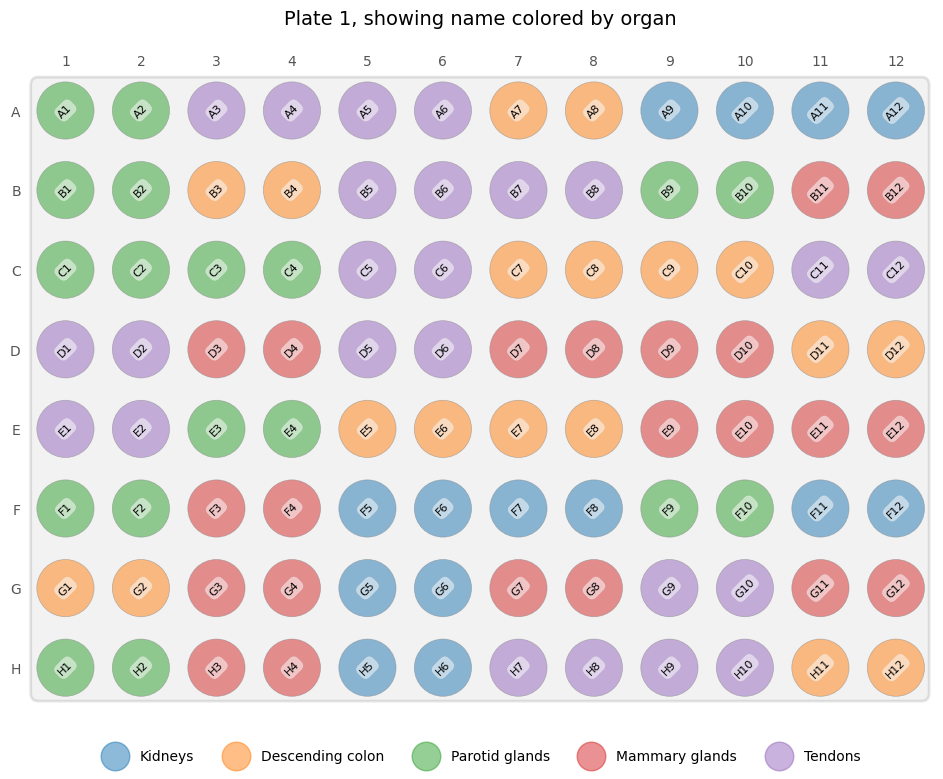

In [ ]:
fig = study[0].as_figure(
    color_metadata_key="organ",
    annotation_metadata_key="name",
    rotation=45,
    well_size=1700,
    plt_style="ggplot",
    colormap="tab10",
    alpha=0.5,
    show_grid=False,
    legend_bb=(0.15, -0.1, 0.7, 1.5),
)

In [ ]:
Plate.create_alphanumerical_coordinates([0,1], [0,1,2])

['A1', 'A2', 'A3', 'B1', 'B2', 'B3']

In [ ]:
fig = study[0].as_plotly_figure(
    color_metadata_key="organ",
    annotation_metadata_key="barcode",
    text_rotation=45,
    alpha=0.5
)

fig.show()

/Users/b279669/anaconda3/envs/plate-planner/lib/python3.10/site-packages/plotly/express/_core.py:1979: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  sf: grouped.get_group(s if len(s) > 1 else s[0])


In [ ]:
fig = study[0].as_plotly_figure(
    color_metadata_key="sample_code",
    theme="ggplot2"
)
fig.show()

In [ ]:
type(fig)

plotly.graph_objs._figure.Figure

In [ ]:
# fig.savefig("plate_layout_example.png",  transparent=True, bbox_inches='tight')

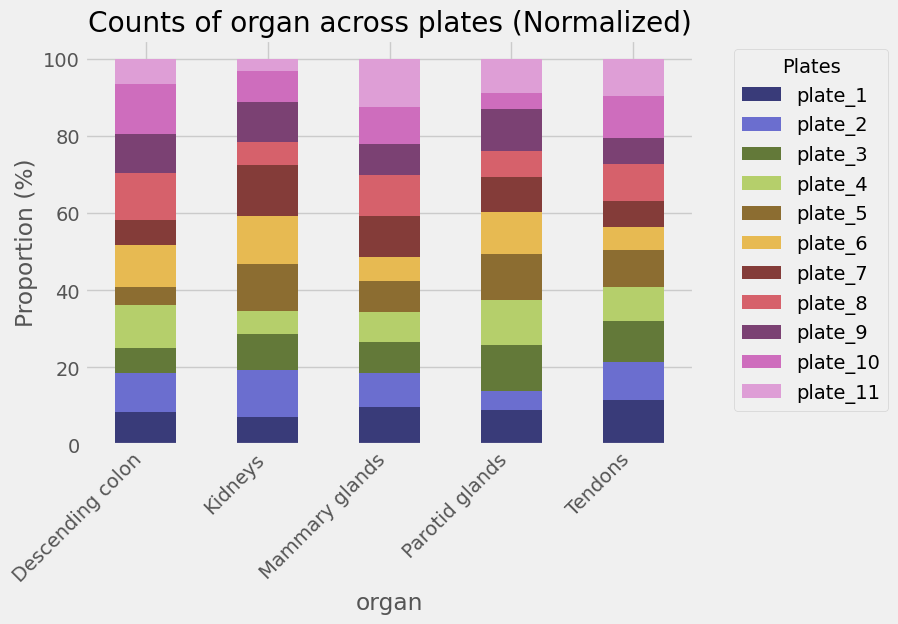

In [ ]:
fig = study.plot_attribute_plate_distributions(attribute="organ", normalize=True, plt_style='fivethirtyeight')
fig.set_size_inches(w=7, h=5)
fig.savefig("study_attribute_plate_distribution_example.png",  transparent=True, bbox_inches='tight')

## QC plate

In [ ]:
study_with_qc = Study("fake_study")
study_with_qc.load_sample_list(fake_samples_csv_file)

[   ERROR] --- Unsupported records format
[    INFO] --- Metadata:


In [ ]:
qc_sample_pattern = Path("../../data/plate_config_dynamic.toml")
qc_plate = QCPlate(QC_config=qc_sample_pattern)

study_with_qc.randomize_order(case_control=True)
study_with_qc.distribute_samples_to_plates(qc_plate)

[    INFO] --- Created a 8x12 plate with 96 wells.
[    INFO] --- Successfully loaded config file ../../data/plate_config_dynamic.toml
[    INFO] --- Creating dynamic plate layout with QC samples.
[   ERROR] --- There are no study records loaded. Use 'load_specimen_records' method to import study records.
[    INFO] --- Distributed samples across 0 plates.


In [ ]:
len(study)

11

## Serialize study

In [ ]:
study_dict = study.to_dict()

In [ ]:
study_from_dict = Study.dict_to_study(study_dict)

[    INFO] --- Created a 8x12 plate with 96 wells.
[    INFO] --- Created a 8x12 plate with 96 wells.
[    INFO] --- Created a 8x12 plate with 96 wells.
[    INFO] --- Created a 8x12 plate with 96 wells.
[    INFO] --- Created a 8x12 plate with 96 wells.
[    INFO] --- Created a 8x12 plate with 96 wells.
[    INFO] --- Created a 8x12 plate with 96 wells.
[    INFO] --- Created a 8x12 plate with 96 wells.
[    INFO] --- Created a 8x12 plate with 96 wells.
[    INFO] --- Created a 8x12 plate with 96 wells.
[    INFO] --- Created a 8x12 plate with 96 wells.


In [ ]:
study_from_dict.sample_records_df

index_before_permutation  pair_ID  Unnamed: 0  specimen_ID   object  \
0                          950      475         950           14  Control   
1                          951      475         951           15     Case   
2                          334      167         334          774  Control   
3                          335      167         335          775     Case   
4                          876      438         876          924  Control   
...                        ...      ...         ...          ...      ...   
1041                       359      179         359         1042     Case   
1042                       960      480         960          876  Control   
1043                       961      480         961          877     Case   
1044                       724      362         724           17  Control   
1045                       725      362         725           18     Case   

     date_of_birth   barcode             organ  
0       1986-06-12  62521529    Parotid glands  
1       1986-06-18  68672768    Parotid glands  
2       1991-11-03   5510764           Tendons  
3       1991-11-06  48329118           Tendons  
4       2001-05-15  83399909           Tendons  
...            ...       ...               ...  
1041    1997-05-05  92992771    Mammary glands  
1042    2002-04-20  50539574  Descending colon  
1043    2002-04-26  52703140  Descending colon  
1044    1987-10-24  91791085    Parotid glands  
1045    1987-10-24  40931630    Parotid glands  

[1046 rows x 8 columns]

In [ ]:
fig = study_with_qc[2].as_figure(
    color_metadata_key="organ",
    annotation_metadata_key="name",
    rotation=45, well_size=1700,
    # plt_style="ggplot",
    # colormap="tab10",
    # show_grid=False,
    # alpha=0.5
    )

fig.savefig("qc_plate_layout_example.png",  transparent=True, bbox_inches='tight')

IndexError: list index out of range

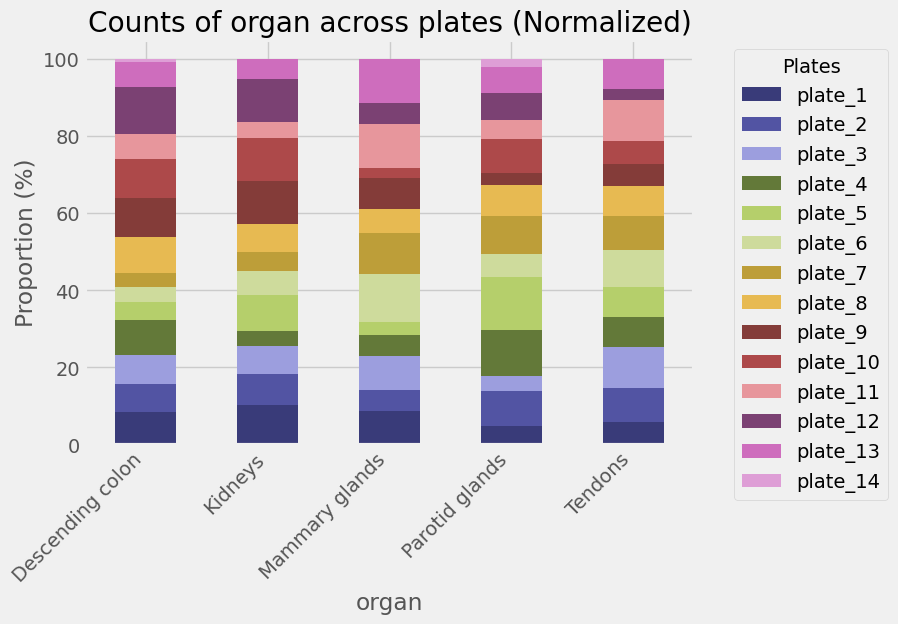

In [ ]:
fig = study_with_qc.plot_attribute_plate_distributions(attribute="organ", normalize=True, plt_style="fivethirtyeight")
fig.set_size_inches(w=7, h=5)
fig.savefig("study_attribute_plate_distribution_example.png",  transparent=True, bbox_inches='tight')

In [ ]:
qcp = QCPlate(plate_dim=(8,12), QC_config="../../data/plate_config_dynamic_2.toml")

[    INFO] --- Created a 8x12 plate with 96 wells.
[    INFO] --- Successfully loaded config file ../../data/plate_config_dynamic_2.toml
[    INFO] --- Creating dynamic plate layout with QC samples.


In [ ]:
qcp.summary_dict()

{'size': 96,
 'dimensions': '8x12',
 'analytical_samples_capacity': 89,
 'sample_codes': ['EC', 'PO', 'S', 'PB']}

In [ ]:
qc_config_dict = qcp.config
qc_config_dict

{'QC': {'start_with_QC_round': True,
  'run_QC_after_n_specimens': 11,
  'names': {'EC': 'EC: External_Control_(matrix)',
   'PB': 'PB: Paper_Blank',
   'PO': 'PO: Pooled_specimens'},
  'patterns': {'round_3': ['EC', 'PO'],
   'start': ['EC', 'PB'],
   'end': ['PB', 'PB', 'PB']}}}

In [ ]:
qc_config_dict = {
    'QC': {
        'start_with_QC_round': False,
        'run_QC_after_n_specimens': 11,
        'names': {
            "KA": "KA: kalle",
            'EC': 'EC: External_Control_(matrix)',
            'PB': 'PB: Paper_Blank',
            'PO': 'PO: Pooled_specimens'
        },
        'patterns': {
            # 'round_1': ['KA', 'KA', "KA"],
            # 'round_2': ['PO', 'PO', 'EC'],
            # 'every_4_rounds': ['EC', 'PB'],
            # 'every_10_rounds': ['PB', 'PO', 'PO'],
            'start': ['EC', 'PB'],
            'alternating': [['EC', 'PB'], ['EC', 'PO']],
            'end': ['PB', 'PB', 'PB'],
            # 'repeat_pattern': {'pattern': ['EC', 'PB'], 'times': 3}
        }
    }
}

qcp = QCPlate(plate_dim=(8,12), QC_config=qc_config_dict)
qcp.as_plotly_figure(annotation_metadata_key="sample_code", color_metadata_key="sample_code")


[    INFO] --- Created a 8x12 plate with 96 wells.
[    INFO] --- Creating dynamic plate layout with QC samples.
/Users/b279669/anaconda3/envs/plate-planner/lib/python3.10/site-packages/plotly/express/_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [ ]:
qc_config_dict = {
    'QC': {
        'start_with_QC_round': True,
        'run_QC_after_n_specimens': 11,
        'names': {
            # 'EC': 'EC: External_Control_(matrix)',
            # 'PB': 'PB: Paper_Blank',
            # 'PO': 'PO: Pooled_specimens'
        },
        'patterns': {
            # 'round_1': ['KA', 'KA', "KA"],
            # 'round_2': ['PO', 'PO', 'EC'],
            # 'every_4_rounds': ['EC', 'PB'],
            # 'every_10_rounds': ['PB', 'PO', 'PO'],
            # 'start': ['EC', 'PB'],
            # 'alternating': [['EC', 'PB'], ['EC', 'PO']],
            # 'end': ['PB', 'PB', 'PB'],
            # 'repeat_pattern': {'pattern': ['EC', 'PB'], 'times': 3}
        }
    }
}

qcp = QCPlate(plate_dim=(8,12), QC_config=qc_config_dict)
qcp.as_plotly_figure(annotation_metadata_key="sample_code", color_metadata_key="sample_code")

[    INFO] --- Created a 8x12 plate with 96 wells.
[    INFO] --- Creating dynamic plate layout with QC samples.


In [ ]:
testplate = PlateFactory.create_plate(QC_config=qc_config_dict)

/Users/b279669/Projects/CD-MRG-PlatePlanner/src/plate_planner/plate.py:1951: UserWarning:

Failed to validate QC scheme: Invalid QC names configuration.

[    INFO] --- Created a 8x12 plate with 96 wells.


In [ ]:
testplate.as_plotly_figure()

In [ ]:
testplate.summary_dict()

{'size': 96,
 'dimensions': '8x12',
 'analytical_samples_capacity': 96,
 'sample_codes': ['S']}

In [ ]:
# Assuming plates is a list of Plate objects
plates = [Plate(plate_dim=(8, 12), plate_id=i) for i in range(1, 4)]  # Example list of Plate objects

# Generate a list of summary dictionaries for each plate
summaries = [plate.summary_dict() for plate in plates]

# Convert the list of dictionaries into a DataFrame
df = pd.DataFrame(summaries)

[    INFO] --- Created a 8x12 plate with 96 wells.
[    INFO] --- Created a 8x12 plate with 96 wells.
[    INFO] --- Created a 8x12 plate with 96 wells.


In [ ]:
df

size dimensions  analytical_samples_capacity sample_codes
0    96       8x12                            0       [None]
1    96       8x12                            0       [None]
2    96       8x12                            0       [None]

In [ ]:
test = {
    "a": 12,
    "b": 21,
}
list(test.keys())


['a', 'b']